<a href="https://colab.research.google.com/github/mlldantas/Stocks/blob/master/StockAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# pip install ta
#!pip install mplfinance

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import ta

In [31]:
import mplfinance as mpf

In [67]:
# Define the stock symbol and date range
stock_symbol = "PETR4.SA"  # Example: PETR4.SA for PETR4 stock on B3
start_date = "2023-01-01"
end_date = datetime.date.today().strftime("%Y-%m-%d")

In [68]:
# Download historical stock data using yfinance
df = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [69]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,20.399244,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,19.883034,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,20.514946,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,21.253662,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,21.129061,51851500
...,...,...,...,...,...,...
2023-06-01,26.299999,27.000000,26.160000,26.959999,26.959999,63148200
2023-06-02,27.430000,27.600000,27.110001,27.180000,27.180000,39919300
2023-06-05,27.540001,27.559999,27.230000,27.469999,27.469999,39321700


In [70]:
# Calculate the 9 and 72-period exponential moving averages (EMAs)
df["ema9"] = ta.trend.ema_indicator(df["Close"], window=9)
df["ema72"] = ta.trend.ema_indicator(df["Close"], window=72)

In [71]:
df

,Open,High,Low,Close,Adj Close,Volume,ema9,ema72
Date,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,20.399244,78424700,NaN,NaN
2023-01-03,22.940001,23.100000,22.129999,22.340000,19.883034,96750300,NaN,NaN
2023-01-04,21.959999,23.590000,21.830000,23.049999,20.514946,129504000,NaN,NaN
2023-01-05,23.340000,24.040001,23.150000,23.879999,21.253662,73886000,NaN,NaN
2023-01-06,23.940001,24.320000,23.549999,23.740000,21.129061,51851500,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-06-01,26.299999,27.000000,26.160000,26.959999,26.959999,63148200,26.396969,25.271487
2023-06-02,27.430000,27.600000,27.110001,27.180000,27.180000,39919300,26.553576,25.323775
2023-06-05,27.540001,27.559999,27.230000,27.469999,27.469999,39321700,26.736860,25.382576


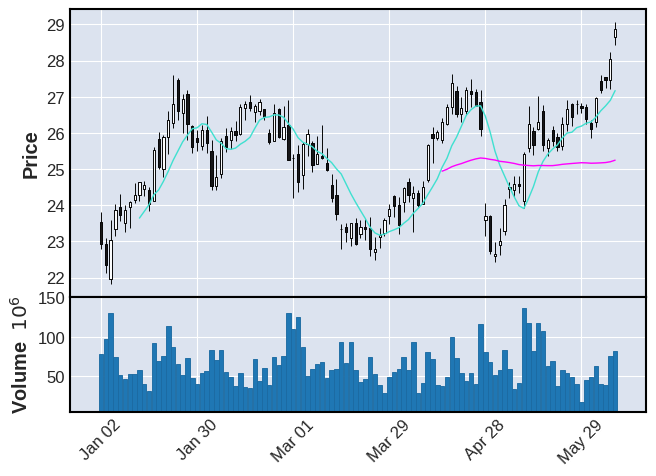

In [72]:
mpf.plot(df, type="candle", mav=(9, 72), volume=True)